                   Source  Estimated_Emission_g_per_person_per_day
0      Synthetic Textiles                                      190
1               Tire Wear                                      140
2  Personal Care Products                                       40
3   Plastic Litter Runoff                                       60
4               City Dust                                       90
5           Road Markings                                       30


/var/folders/xk/nx5_p6qn1sv_n_tt4nj_xrxr0000gn/T/ipykernel_8758/371173976.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Estimated_Emission_g_per_person_per_day', y='Source', palette="viridis")


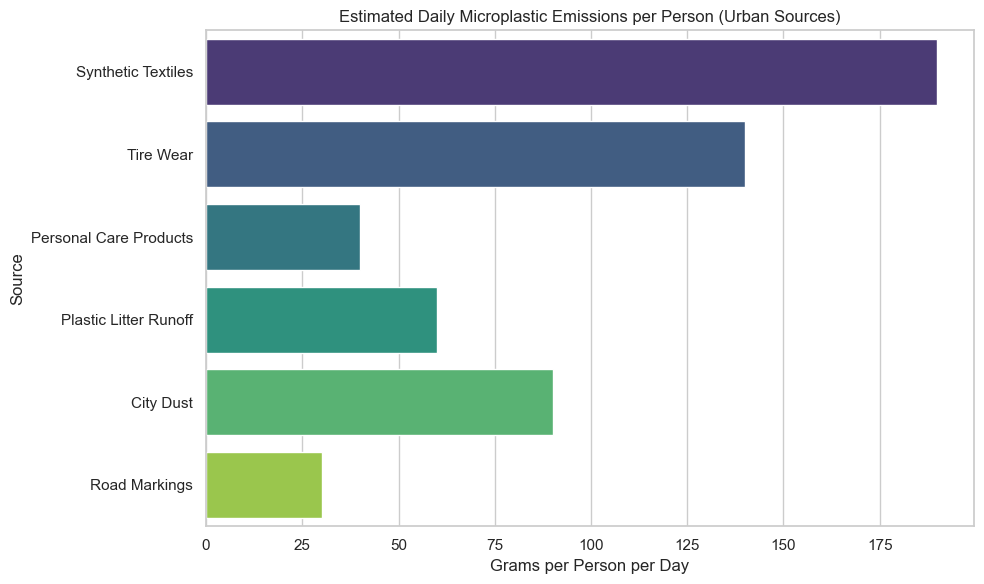

/var/folders/xk/nx5_p6qn1sv_n_tt4nj_xrxr0000gn/T/ipykernel_8758/371173976.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Total_Environmental_Load_g', y='Source', palette="magma")


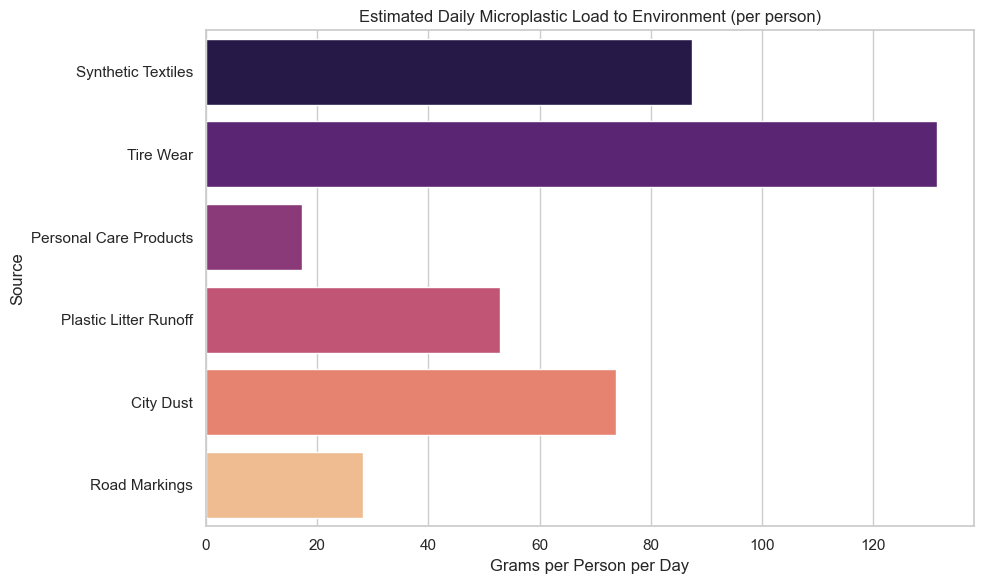

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("../data/microplastics_sources.csv")

print(df)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Estimated_Emission_g_per_person_per_day', y='Source', palette="viridis")
plt.title("Estimated Daily Microplastic Emissions per Person (Urban Sources)")
plt.xlabel("Grams per Person per Day")
plt.ylabel("Source")
plt.tight_layout()
plt.show()

# Add pathway percentages
df['To_Wastewater_%'] = [90, 10, 95, 20, 30, 10]
df['To_Stormwater_%'] = 100 - df['To_Wastewater_%']

# Calculate grams to each pathway
df['To_Wastewater_g'] = df['Estimated_Emission_g_per_person_per_day'] * df['To_Wastewater_%'] / 100
df['To_Stormwater_g'] = df['Estimated_Emission_g_per_person_per_day'] * df['To_Stormwater_%'] / 100

# Assume 60% treatment efficiency
treatment_efficiency = 0.6
df['Removed_in_Treatment_g'] = df['To_Wastewater_g'] * treatment_efficiency
df['Released_from_Wastewater_g'] = df['To_Wastewater_g'] * (1 - treatment_efficiency)

# Total released into environment (stormwater + untreated wastewater)
df['Total_Environmental_Load_g'] = df['To_Stormwater_g'] + df['Released_from_Wastewater_g']

# Preview results
df[['Source', 'Estimated_Emission_g_per_person_per_day', 'Total_Environmental_Load_g']]


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Total_Environmental_Load_g', y='Source', palette="magma")
plt.title("Estimated Daily Microplastic Load to Environment (per person)")
plt.xlabel("Grams per Person per Day")
plt.ylabel("Source")
plt.tight_layout()
plt.show()
